In [1]:
## SECTION 1
## 1) Using the models.json files, extract dimension for the bounding boxes for all the models.
## 2) Then for each type of car (2x, 3x, SUV) find the average dimensions of the bounding box for each type.
## 3) Compute the vertices and the faces that will define the bounding boxes for each case and create json
##    for each of the car type.

## SECTION 2
## 4) Use jsons from step 3 to project onto a specified image
##    Will overlay all three boxes and then put all three together on each of the models in the image.

In [2]:
## SECTION 1

In [3]:
import numpy as np
import pandas as pd
import glob, os, json

In [4]:
modelDir = '/home/rohit/PyWDUbuntu/CaseStudy2/car_models_json/'
modelFilesList = os.listdir(modelDir)
opFileDir = '/home/rohit/PyWDUbuntu/CaseStudy2/my_car_models_json/'

In [5]:
modelFilesList

['benchi-ML500.json',
 'bieke-kaiyue.json',
 'fengtian-SUV-gai.json',
 'biaozhi-408.json',
 'baoma-530.json',
 'baoma-330.json',
 'biyadi-tang.json',
 'fengtian-weichi-2006.json',
 'fengtian-liangxiang.json',
 'dazhong-SUV.json',
 'dongfeng-DS5.json',
 'MG-GT-2015.json',
 'lingmu-SX4-2012.json',
 '036-CAR01.json',
 'sikeda-jingrui.json',
 'fute.json',
 'aodi-Q7-SUV.json',
 'bentian-fengfan.json',
 'lingmu-aotuo-2009.json',
 'benchi-SUR.json',
 'baoma-X5.json',
 'yingfeinidi-SUV.json',
 'supai-2016.json',
 'Skoda_Fabia-2011.json',
 'haima-3.json',
 'benchi-GLK-300.json',
 'qirui-ruihu.json',
 'lingmu-swift.json',
 'feiyate.json',
 'biaozhi-liangxiang.json',
 'lufeng-X8.json',
 'leikesasi.json',
 'yingfeinidi-qx80.json',
 'fengtian-MPV.json',
 'sanling-oulande.json',
 'mazida-6-2015.json',
 'dongfeng-yulong-naruijie.json',
 'dazhong.json',
 'bieke.json',
 '037-CAR02.json',
 'dihao-EV.json',
 'qiya.json',
 'changan-cs5.json',
 'xiandai-i25-2016.json',
 'dazhongmaiteng.json',
 'oubao.json'

In [6]:
dfColumns = [ 'modelFileName', 'carType', 'ZbyX_GroupNo', 'Xspan', 'Yspan', 'Zspan', 'XbyY', 'XbyZ', 'YbyX', 'YbyZ', 'ZbyX', 'ZbyY', 'Xmin', 'Xmax', 'Ymin', 'Ymax', 'Zmin', 'Zmax', 'countVertices', 'countFaces']
dfColumnsDtypes = [str, str, int, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, int, int]
df = pd.DataFrame(columns = dfColumns)
#df = df.astype({"wav_filename": str, "wav_filesize": int, 'transcript': str})
df = df.astype(dict(zip(dfColumns, dfColumnsDtypes)))

In [7]:
df.dtypes

modelFileName     object
carType           object
ZbyX_GroupNo       int64
Xspan            float64
Yspan            float64
Zspan            float64
XbyY             float64
XbyZ             float64
YbyX             float64
YbyZ             float64
ZbyX             float64
ZbyY             float64
Xmin             float64
Xmax             float64
Ymin             float64
Ymax             float64
Zmin             float64
Zmax             float64
countVertices      int64
countFaces         int64
dtype: object

In [8]:
## Earlier approach was to categories based on the ratio of Length / Width (i.e. ZbyX) into bins specified
## But later simply using the car type specified in each model.json file.

In [9]:
## put the upper bounds for each bin in list
## logic defaults group = len(list) + 1, then compares ratio with upper bounds
##    from left to right. If ratio found < upper bound then assigns appropriate value
## mapping should work as:
## say ZbyX_ranges = [2.0, 2.25, 2.5]
## ratio         group no.
##  0.0            1
##  1.99           1
##  2.0            2
##  2.24           2
##  2.25           3
##  2.49           3
##  2.50 and +     4
#
ZbyX_ranges_list = [2.0, 2.25, 2.50]

In [10]:
for modelFile in modelFilesList:
    with open(modelDir + modelFile) as json_file:
        data = json.load(json_file)
    vertices = np.array(data['vertices'])
    vertices[:, 1] = -vertices[:, 1]
    triangles = np.array(data['faces']) - 1
    car_type = data['car_type']
    Xmin = min(vertices[:,0])
    Xmax = max(vertices[:,0])
    Ymin = min(vertices[:,1])
    Ymax = max(vertices[:,1])
    Zmin = min(vertices[:,2])
    Zmax = max(vertices[:,2])
    Xspan = abs(Xmin - Xmax)
    Yspan = abs(Ymin - Ymax)
    Zspan = abs(Zmin - Zmax)
    countVertices = len(vertices)
    countFaces = len(triangles)
    #
    ZbyX_GroupNo = len(ZbyX_ranges_list) ## default to max Group No
    ZtoX_ratio = Zspan/ Xspan
    for i, upperBound in enumerate(ZbyX_ranges_list):
        if ZtoX_ratio < upperBound:
            ZbyX_GroupNo = i+1
            break
    #
    dfColumnsData = [ modelFile, car_type, ZbyX_GroupNo, Xspan, Yspan, Zspan, (Xspan/Yspan), (Xspan/Zspan), (Yspan/Xspan), (Yspan/Zspan), (Zspan/Xspan), (Zspan/Yspan), Xmin, Xmax, Ymin, Ymax, Zmin, Zmax, countVertices, countFaces]
    df = df.append( dict(zip(dfColumns, dfColumnsData)) , ignore_index = True)

In [11]:
## Zspan seems to be length of car
## Yspan seems to height
## Xspan seems to width

In [12]:
df

,modelFileName,carType,ZbyX_GroupNo,Xspan,Yspan,Zspan,XbyY,XbyZ,YbyX,YbyZ,ZbyX,ZbyY,Xmin,Xmax,Ymin,Ymax,Zmin,Zmax,countVertices,countFaces
0,benchi-ML500.json,SUV,2,2.166960,1.850979,4.834587,1.170710,0.448220,0.854182,0.382862,2.231046,2.611908,-1.083480,1.083480,-0.925489,0.925489,-2.417294,2.417294,3753,5000
1,bieke-kaiyue.json,3x,2,2.012573,1.459076,4.509909,1.379347,0.446256,0.724980,0.323527,2.240867,3.090934,-1.006287,1.006287,-0.729538,0.729538,-2.254954,2.254954,3573,4999
2,fengtian-SUV-gai.json,SUV,2,2.101100,1.706829,4.514746,1.230996,0.465386,0.812350,0.378057,2.148753,2.645107,-1.050550,1.050550,-0.853415,0.853415,-2.257373,2.257373,3994,4999
3,biaozhi-408.json,3x,3,2.080003,1.493445,4.806027,1.392755,0.432790,0.718001,0.310744,2.310587,3.218082,-1.040001,1.040001,-0.746722,0.746722,-2.403014,2.403014,3936,4999
4,baoma-530.json,3x,3,2.148633,1.539560,4.988580,1.395614,0.430710,0.716530,0.308617,2.321746,3.240262,-1.074316,1.074316,-0.769780,0.769780,-2.494290,2.494290,3506,4999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,biyadi-F3.json,3x,3,1.781081,1.424964,4.250462,1.249912,0.419032,0.800056,0.335249,2.386451,2.982855,-0.890540,0.890540,-0.712482,0.712482,-2.125231,2.125231,3296,4999
75,jili-boyue.json,SUV,2,2.043992,1.703700,4.468129,1.199737,0.457460,0.833516,0.381301,2.185982,2.622603,-1.021996,1.021996,-0.851850,0.851850,-2.234065,2.234065,4696,5000
76,biaozhi-3008.json,2x,1,2.214842,1.670562,4.396844,1.325807,0.503735,0.754258,0.379946,1.985173,2.631955,-1.107421,1.107421,-0.835281,0.835281,-2.198422,2.198422,3691,5000
77,kaidilake-CTS.json,3x,3,1.967823,1.602014,5.134826,1.228344,0.383231,0.814104,0.311990,2.609394,3.205232,-0.983912,0.983912,-0.801007,0.801007,-2.567413,2.567413,3702,5000


In [13]:
## See the max and min for the Length / Width ratio
print(f"min ratio = {df['ZbyX'].min()}\tmax ratio = {df['ZbyX'].max()}")

min ratio = 1.8305778375138466	max ratio = 2.676111977934337


In [14]:
## see how many cars of each type are present
for eachCarType in df['carType'].unique():
    print(f"no. of cars for {eachCarType} = {(df['carType'] == eachCarType).sum()}")

no. of cars for SUV = 34
no. of cars for 3x = 30
no. of cars for 2x = 15


In [15]:
## see how many cars of each type are present in the Length/Width ratio bins
sorted_group_list = list(df['ZbyX_GroupNo'].unique())
sorted_group_list.sort()
for eachGroup in sorted_group_list:
    print(f"no. of cars for group {eachGroup} = {(df['ZbyX_GroupNo'] == eachGroup).sum()}")

no. of cars for group 1 = 5
no. of cars for group 2 = 35
no. of cars for group 3 = 39


In [16]:
df['countVertices'].unique()

array([3753, 3573, 3994, 3936, 3506, 3694, 4820, 3475, 3638, 3819, 4300,
       3768, 3643, 4120, 5711, 3248, 4018, 3176, 3511, 3885, 4112, 3811,
       3823, 3593, 4084, 3613, 3743, 3642, 3286, 3645, 4234, 3527, 3987,
       3978, 3229, 3650, 4825, 3083, 4646, 3896, 5033, 4723, 4202, 3174,
       3900, 4531, 3887, 5750, 3360, 4159, 4263, 3447, 3962, 3773, 2957,
       4805, 3967, 3750, 3740, 4294, 3230, 3600, 3925, 3359, 3585, 3644,
       3366, 3736, 3503, 3280, 3595, 3408, 3296, 4696, 3691, 3702, 3436])

In [17]:
df['countFaces'].unique()

array([5000, 4999])

In [18]:
## Write data to CSV file -  one row per model

In [19]:
df.to_csv(opFileDir + 'model_data_extracted.csv', index=False)

In [20]:
## EARLIER grouping as per ZbyX ratio -- kept code for reference
df1 = df.groupby(['ZbyX_GroupNo']).mean()
df1

,Xspan,Yspan,Zspan,XbyY,XbyZ,YbyX,YbyZ,ZbyX,ZbyY,Xmin,Xmax,Ymin,Ymax,Zmin,Zmax,countVertices,countFaces
ZbyX_GroupNo,,,,,,,,,,,,,,,,,
1,1.968844,1.577216,3.784159,1.254314,0.521444,0.802910,0.418199,1.920047,2.405919,-0.984422,0.984422,-0.788608,0.788608,-1.892080,1.892080,3628.000000,4999.400000
2,2.080711,1.654640,4.496462,1.261340,0.463508,0.795830,0.368789,2.159593,2.723461,-1.040355,1.040355,-0.827320,0.827320,-2.248231,2.248231,3936.714286,4999.571429
3,2.026688,1.571744,4.826369,1.297911,0.419972,0.778842,0.326357,2.386100,3.090273,-1.013344,1.013344,-0.785872,0.785872,-2.413185,2.413185,3828.974359,4999.538462


In [21]:
df1.to_csv(opFileDir + 'modelAvg_group_ZbyX_extracted.csv', index=True)

In [22]:
## NOW grouping as per carType
df1 = df.groupby(['carType']).mean()
df1

,ZbyX_GroupNo,Xspan,Yspan,Zspan,XbyY,XbyZ,YbyX,YbyZ,ZbyX,ZbyY,Xmin,Xmax,Ymin,Ymax,Zmin,Zmax,countVertices,countFaces
carType,,,,,,,,,,,,,,,,,,
2x,1.866667,1.961005,1.553200,4.061493,1.269005,0.485548,0.792741,0.384441,2.071480,2.625212,-0.980502,0.980502,-0.776600,0.776600,-2.030746,2.030746,3748.533333,4999.533333
3x,2.866667,2.038018,1.489942,4.812416,1.367894,0.423547,0.733780,0.310297,2.365155,3.230294,-1.019009,1.019009,-0.744971,0.744971,-2.406208,2.406208,3712.100000,4999.533333
SUV,2.294118,2.092774,1.738241,4.683250,1.204856,0.447626,0.833498,0.372088,2.241678,2.693658,-1.046387,1.046387,-0.869121,0.869121,-2.341625,2.341625,4048.941176,4999.558824


In [23]:
df1.to_csv(opFileDir + 'modelAvg_group_carType_extracted.csv', index=True)

In [24]:
df2 = pd.read_csv(opFileDir + 'modelAvg_group_carType_extracted.csv')

In [25]:
df2

,carType,ZbyX_GroupNo,Xspan,Yspan,Zspan,XbyY,XbyZ,YbyX,YbyZ,ZbyX,ZbyY,Xmin,Xmax,Ymin,Ymax,Zmin,Zmax,countVertices,countFaces
0,2x,1.866667,1.961005,1.553200,4.061493,1.269005,0.485548,0.792741,0.384441,2.071480,2.625212,-0.980502,0.980502,-0.776600,0.776600,-2.030746,2.030746,3748.533333,4999.533333
1,3x,2.866667,2.038018,1.489942,4.812416,1.367894,0.423547,0.733780,0.310297,2.365155,3.230294,-1.019009,1.019009,-0.744971,0.744971,-2.406208,2.406208,3712.100000,4999.533333
2,SUV,2.294118,2.092774,1.738241,4.683250,1.204856,0.447626,0.833498,0.372088,2.241678,2.693658,-1.046387,1.046387,-0.869121,0.869121,-2.341625,2.341625,4048.941176,4999.558824


In [26]:
## Zspan seems to be length of car
## Yspan seems to height
## Xspan seems to width

In [27]:
df3Columns = [ 'carType', 'vertices', 'faces']
df3ColumnsDtypes = [str, str, str]
df3 = pd.DataFrame(columns = df3Columns)
df3 = df3.astype(dict(zip(df3Columns, df3ColumnsDtypes)))

In [28]:
df3

,carType,vertices,faces


In [29]:
for row in df2.itertuples():
    dictRow = row._asdict()
    #ZbyX_GroupNo = str(dictRow['ZbyX_GroupNo']) -- not using this approach now
    car_type = dictRow['carType']
    Xu, Yu, Zu, = dictRow['Xmax'], dictRow['Ymax'], dictRow['Zmax']  ## unit distances for X Y and Z
    vertices = []
    faces = []
    vertices.append([Xu,Yu,Zu])   # 1
    vertices.append([-Xu,Yu,Zu])  # 2
    vertices.append([-Xu,-Yu,Zu]) # 3
    vertices.append([Xu,-Yu,Zu])  # 4
    vertices.append([Xu,Yu,-Zu])  # 5
    vertices.append([-Xu,Yu,-Zu]) # 6
    vertices.append([-Xu,-Yu,-Zu]) # 7
    vertices.append([Xu,-Yu,-Zu]) # 8
    faces.append([2,1,4]) ## front face
    faces.append([2,3,4])
    faces.append([5,6,7]) ## back face
    faces.append([5,8,7])
    faces.append([4,1,5]) ## right face
    faces.append([4,8,5])
    faces.append([3,2,6]) ## left face
    faces.append([3,7,6])    
    #
    df3ColumnsData = [ car_type, vertices, faces]
    df3 = df3.append( dict(zip(df3Columns, df3ColumnsData)) , ignore_index = True)

In [30]:
df3

,carType,vertices,faces
0,2x,"[[0.9805024993333332, 0.7765997836666667, 2.03...","[[2, 1, 4], [2, 3, 4], [5, 6, 7], [5, 8, 7], [..."
1,3x,"[[1.0190089073333335, 0.7449712106666666, 2.40...","[[2, 1, 4], [2, 3, 4], [5, 6, 7], [5, 8, 7], [..."
2,SUV,"[[1.0463871564705884, 0.8691205857352942, 2.34...","[[2, 1, 4], [2, 3, 4], [5, 6, 7], [5, 8, 7], [..."


In [31]:
dfTemp = df3.iloc[0:1]

In [32]:
type(dfTemp)

pandas.core.frame.DataFrame

In [33]:
dfTemp

,carType,vertices,faces
0,2x,"[[0.9805024993333332, 0.7765997836666667, 2.03...","[[2, 1, 4], [2, 3, 4], [5, 6, 7], [5, 8, 7], [..."


In [34]:
df3['carType']

0     2x
1     3x
2    SUV
Name: carType, dtype: object

In [35]:
## NOTE: Edit all the three jsons manually: Remove the square brackets at the start and end of the file.
## Else it will not work in the code below.
##
## AUTOMATED this now ********

In [36]:
## E.g. file will initially look like this:
## [{"carType":"SUV","vertices":[[1.0463871565,0.8691205 ... blah blah ... 5],[3,2,6],[3,7,6]]}]
#
## Edit it to be like this:
## {"carType":"SUV","vertices":[[1.0463871565,0.8691205 ... blah blah ... 5],[3,2,6],[3,7,6]]}

In [37]:
carTypeList = ['2x', '3x', 'SUV']
jsonFilesList = []
for i in range(len(df3)):
    # index=False option only allowed for orient = table or split
    df3.iloc[i:i+1].to_json(opFileDir + 'groupAvg_' + carTypeList[i] + '_model.json', orient='records')
    jsonFilesList.append(opFileDir + 'groupAvg_' + carTypeList[i] + '_model.json')

In [38]:
jsonFilesList

['/home/rohit/PyWDUbuntu/CaseStudy2/my_car_models_json/groupAvg_2x_model.json',
 '/home/rohit/PyWDUbuntu/CaseStudy2/my_car_models_json/groupAvg_3x_model.json',
 '/home/rohit/PyWDUbuntu/CaseStudy2/my_car_models_json/groupAvg_SUV_model.json']

In [39]:
## reopen the files and edit them to remove the unwanted square brackets at start and end

In [40]:
## option 2: recommended as Pythonic way
## https://stackoverflow.com/questions/40865190/how-to-update-line-of-file-in-python
import shutil
for eachFile in jsonFilesList:
    with open (eachFile, 'r') as fin:
        with open('temp.json', 'w') as temp_file:
            for line in fin:
                line = line[1:-1] ## remove the square brackets at start and end
                temp_file.write(line)
    shutil.move('temp.json', eachFile)

In [41]:
## option 1: not recommended as not Pythonic way
## https://stackoverflow.com/questions/39086/search-and-replace-a-line-in-a-file-in-python
#for eachFile in jsonFilesList[0:1]:
#    with open (eachFile, 'r+') as fin:
#        for line in fin:
#            line = line[1:-1] ## remove the square brackets at start and end
#            fin.seek(0)
#            fin.truncate()
#            fin.write(line)

In [42]:
## SECTION 2
#
## Now we can use the jsons just created
#
## https://www.kaggle.com/ebouteillon/augmented-reality

In [1]:
import json
from math import sin, cos
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
json_Dir = '/home/rohit/PyWDUbuntu/CaseStudy2/my_car_models_json/'
image_Dir = '/home/rohit/PyWDUbuntu/CaseStudy2/train_images/'

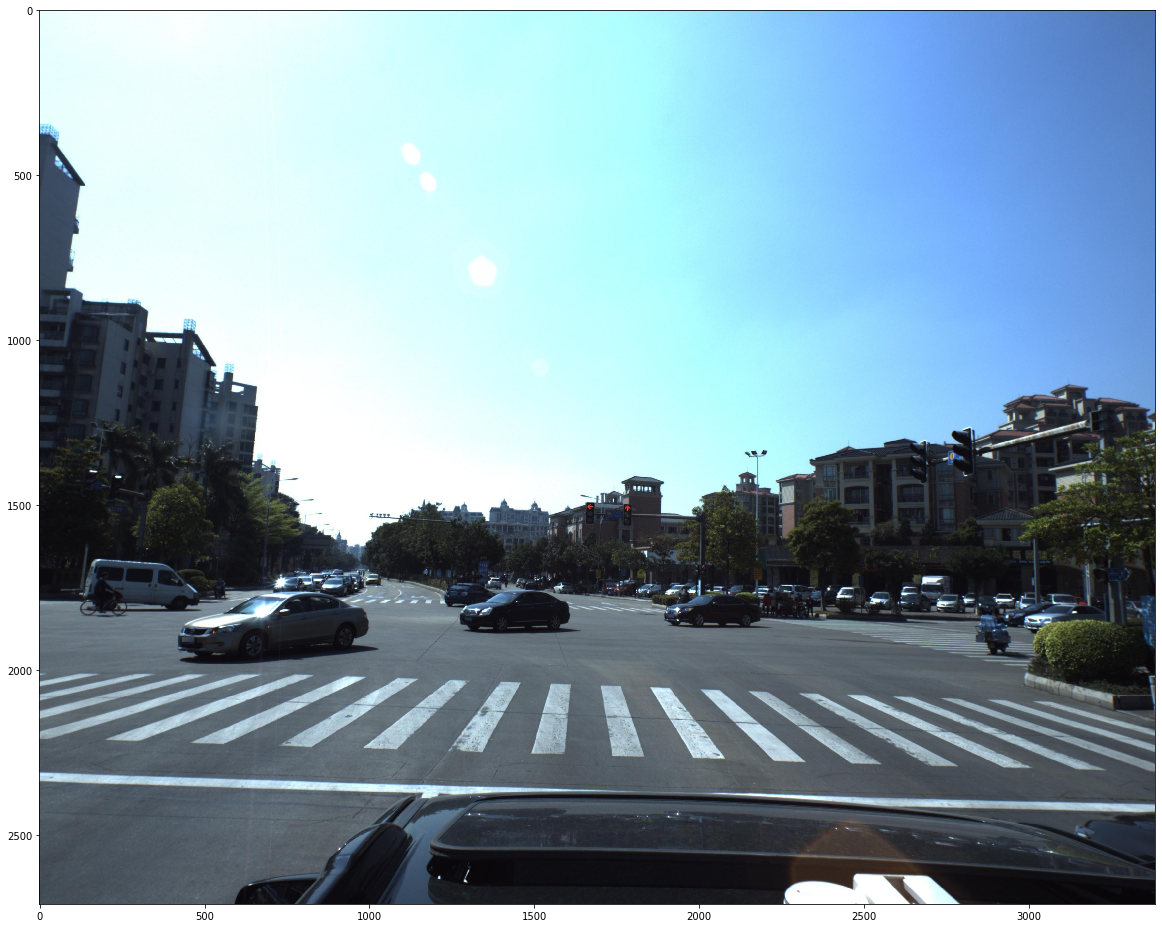

In [3]:
# Load an image
img_name = 'ID_2d2ce3d39'  # 'ID_2f118747e'  # 'ID_0c5d0b76b'  # 'ID_0a0980d15'
img = cv2.imread( image_Dir + img_name + '.jpg',cv2.COLOR_BGR2RGB)[:,:,::-1]
plt.figure(figsize=(20, 20))
plt.imshow(img);

In [4]:
train = pd.read_csv('/home/rohit/PyWDUbuntu/CaseStudy2/train.csv')
pred_string = train[train.ImageId == img_name].PredictionString.iloc[0]
items = pred_string.split(' ')
model_types, yaws, pitches, rolls, xs, ys, zs = [items[i::7] for i in range(7)]

In [5]:
# k is camera instrinsic matrix
k = np.array([[2304.5479, 0,  1686.2379],
           [0, 2305.8757, 1354.9849],
           [0, 0, 1]], dtype=np.float32)

# convert euler angle to rotation matrix
def euler_to_Rot(yaw, pitch, roll):
    Y = np.array([[cos(yaw), 0, sin(yaw)],
                  [0, 1, 0],
                  [-sin(yaw), 0, cos(yaw)]])
    P = np.array([[1, 0, 0],
                  [0, cos(pitch), -sin(pitch)],
                  [0, sin(pitch), cos(pitch)]])
    R = np.array([[cos(roll), -sin(roll), 0],
                  [sin(roll), cos(roll), 0],
                  [0, 0, 1]])
    return np.dot(Y, np.dot(P, R))

In [6]:
## overlaying a cuboid as the bb

In [7]:
# Load averaged 3D model of a car for car type 2x
with open(json_Dir + 'groupAvg_2x_model.json') as json_file:
    data = json.load(json_file)
vertices_2x = np.array(data['vertices'])
#vertices[:, 1] = -vertices[:, 1]
triangles_2x = np.array(data['faces']) - 1
#
# Load averaged 3D model of a car for car type 3x
with open(json_Dir + 'groupAvg_3x_model.json') as json_file:
    data = json.load(json_file)
vertices_3x = np.array(data['vertices'])
#vertices[:, 1] = -vertices[:, 1]
triangles_3x = np.array(data['faces']) - 1
#
# Load averaged 3D model of a car for for car type SUV
with open(json_Dir + 'groupAvg_SUV_model.json') as json_file:
    data = json.load(json_file)
vertices_SUV = np.array(data['vertices'])
#vertices[:, 1] = -vertices[:, 1]
triangles_SUV = np.array(data['faces']) - 1

In [8]:
def draw_obj(image, vertices, triangles, color):
    for t in triangles:
        coord = np.array([vertices[t[0]][:2], vertices[t[1]][:2], vertices[t[2]][:2]], dtype=np.int32)
#         cv2.fillConvexPoly(image, coord, (0,0,255))
        cv2.polylines(image, np.int32([coord]), 0, color, thickness = 10)
    

In [9]:
overlay = np.zeros_like(img)
for yaw, pitch, roll, x, y, z in zip(yaws, pitches, rolls, xs, ys, zs):
    yaw, pitch, roll, x, y, z = [float(x) for x in [yaw, pitch, roll, x, y, z]]
    # I think the pitch and yaw should be exchanged
    yaw, pitch, roll = -pitch, -yaw, -roll
    Rt = np.eye(4)
    t = np.array([x, y, z])
    Rt[:3, 3] = t
    Rt[:3, :3] = euler_to_Rot(yaw, pitch, roll).T
    Rt = Rt[:3, :]
    #
    ## Create the 2x cuboid in BLUE color
    #P = np.ones((vertices_2x.shape[0],vertices_2x.shape[1]+1))
    #P[:, :-1] = vertices_2x
    #P = P.T
    #img_cor_points = np.dot(k, np.dot(Rt, P))
    #img_cor_points = img_cor_points.T
    #img_cor_points[:, 0] /= img_cor_points[:, 2]
    #img_cor_points[:, 1] /= img_cor_points[:, 2]
    #color = (0,0,255)
    #draw_obj(overlay, img_cor_points, triangles_2x, color)
    #
    ## Create the 3x cuboid in GREEN color
    P = np.ones((vertices_3x.shape[0],vertices_3x.shape[1]+1))
    P[:, :-1] = vertices_3x
    P = P.T
    img_cor_points = np.dot(k, np.dot(Rt, P))
    img_cor_points = img_cor_points.T
    img_cor_points[:, 0] /= img_cor_points[:, 2]
    img_cor_points[:, 1] /= img_cor_points[:, 2]
    color = (0,255,0)
    draw_obj(overlay, img_cor_points, triangles_3x, color)
    #
    ## Create the SUV cuboid in RED color
    #P = np.ones((vertices_SUV.shape[0],vertices_SUV.shape[1]+1))
    #P[:, :-1] = vertices_SUV
    #P = P.T
    #img_cor_points = np.dot(k, np.dot(Rt, P))
    #img_cor_points = img_cor_points.T
    #img_cor_points[:, 0] /= img_cor_points[:, 2]
    #img_cor_points[:, 1] /= img_cor_points[:, 2]
    #color = (255,0,0)
    #draw_obj(overlay, img_cor_points, triangles_SUV, color)

In [10]:
## Now place cuboids into image

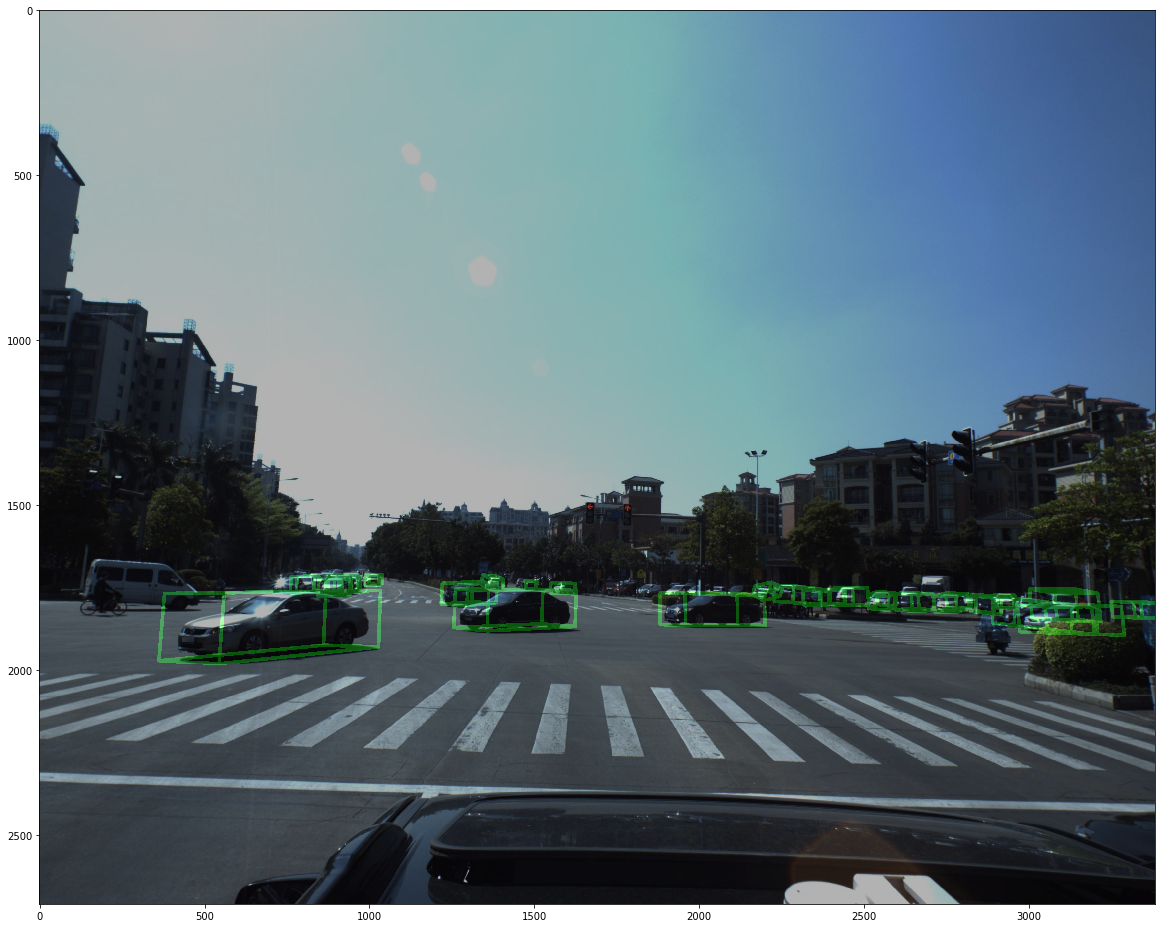

In [11]:
alpha = .3
img = np.array(img)
img_copy = img.copy()
cv2.addWeighted(overlay, alpha, img_copy, 1 - alpha, 0, img_copy)
plt.figure(figsize=(20,20))
plt.imshow(img_copy);